In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


In [7]:
x_train[310].shape

(28, 28)

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
y_train[310]

1

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
y_train[310]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
import keras.optimizers

In [19]:
model = Sequential()
model.add(Conv2D(10, (5, 5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(20, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(40, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 30)          15030     
__________

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=7)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
60000/60000 [==============================] - 94s 2ms/step - loss: 0.3144 - acc: 0.9027
Epoch 2/7
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0800 - acc: 0.9751
Epoch 3/7
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0575 - acc: 0.9823
Epoch 4/7
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0430 - acc: 0.9864
Epoch 5/7
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0365 - acc: 0.9886: 3s - 
Epoch 6/7
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0300 - acc: 0.9904
Epoch 7/7
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0253 - acc: 0.9917


In [23]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 4s 359us/step
loss: 0.03040133270092556
正確率 0.9901


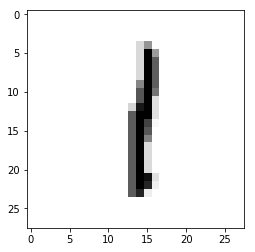

In [31]:
X=x_train[310].reshape(28,28)
plt.imshow(X,cmap='Greys')